<a href="https://colab.research.google.com/github/Yrenejaime/reportepractica/blob/main/practica_ipynb%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

primer paso montamos el drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


cargar librerias


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import json

subir la base de datos a analizar
egresos-2020

In [3]:
df= pd.read_csv("/content/drive/MyDrive/practica/egresos-2020.csv")

MOSTRAMOS LA BASE DE DATOS A REALIZAR EL ANALISIS

In [4]:
df.head ()

,anio,region_sanitaria,municipio_nombre,municipio_id,sexo,grupo_edad,causa_egreso_capitulo,causa_egreso_agrupamiento,tipo_egreso,cantidad
0,2020,X,25 de mayo,6854,Ignorado,0-4,Embarazo parto y puerperio,Complicaciones del trabajo de parto y del parto,Alta definitiva,1
1,2020,X,25 de mayo,6854,Ignorado,oct-14,Factores que influyen en el estado de salud y ...,Todos,Alta definitiva,1
2,2020,X,25 de mayo,6854,Ignorado,75-79,Enfermedad del sistema genitourinario,Demás enfermedades del sistema genitourinario,Alta definitiva,1
3,2020,I,Bahía Blanca,6056,Ignorado,45-49,Tumores,Tumor malignodel utero,Alta definitiva,1
4,2020,VI,Berazategui,6091,Ignorado,20-24,Embarazo parto y puerperio,Aborto,Alta definitiva,1


In [9]:
df.describe ()

,anio,municipio_id,cantidad
count,158920.0,158920.000000,158920.000000
mean,2020.0,6457.705720,5.740958
std,0.0,249.813786,27.559556
min,2020.0,6007.000000,1.000000
25%,2020.0,6252.000000,1.000000
50%,2020.0,6462.000000,2.000000
75%,2020.0,6658.000000,4.000000
max,2020.0,6882.000000,2863.000000


In [10]:
df['grupo_edad'].value_counts ()

80 y mas    11823
60-64       10742
65-69       10548
55-59       10328
70-74       10092
40-44        9981
45-49        9845
50-54        9787
25-29        9750
35-39        9598
30-34        9584
20-24        9448
75-79        9312
15-19        8167
0-4          7909
oct-14       5826
05-sep       5534
Ignorado      646
Name: grupo_edad, dtype: int64

INTENTAMOS REALIZAR UN ANALISIS DE DOS VARIABLES DE NUESTRA BASE DE DATOS CON UN GRAFICO DE DISPERSION PERO HUBO UN ERROR EL CUAL NO NOS PROPORCIONO INFORMACION REQUERIDA

<Axes: xlabel='tipo_egreso', ylabel='cantidad'>

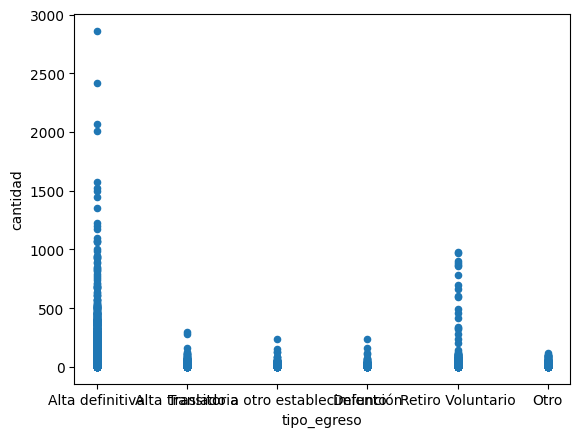

In [24]:
df.plot.scatter(x='tipo_egreso',y= 'cantidad')

<Axes: ylabel='Frequency'>

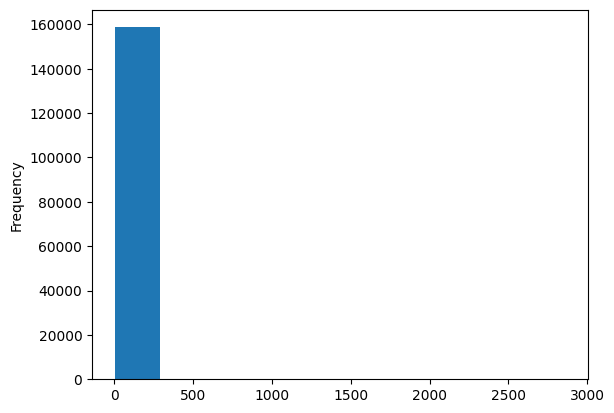

In [25]:
df['cantidad'].plot.hist()

0-4               Axes(0.1,0.77069;0.173913x0.12931)
05-sep       Axes(0.308696,0.77069;0.173913x0.12931)
15-19        Axes(0.517391,0.77069;0.173913x0.12931)
20-24        Axes(0.726087,0.77069;0.173913x0.12931)
25-29            Axes(0.1,0.615517;0.173913x0.12931)
30-34       Axes(0.308696,0.615517;0.173913x0.12931)
35-39       Axes(0.517391,0.615517;0.173913x0.12931)
40-44       Axes(0.726087,0.615517;0.173913x0.12931)
45-49            Axes(0.1,0.460345;0.173913x0.12931)
50-54       Axes(0.308696,0.460345;0.173913x0.12931)
55-59       Axes(0.517391,0.460345;0.173913x0.12931)
60-64       Axes(0.726087,0.460345;0.173913x0.12931)
65-69            Axes(0.1,0.305172;0.173913x0.12931)
70-74       Axes(0.308696,0.305172;0.173913x0.12931)
75-79       Axes(0.517391,0.305172;0.173913x0.12931)
80 y mas    Axes(0.726087,0.305172;0.173913x0.12931)
Ignorado             Axes(0.1,0.15;0.173913x0.12931)
oct-14          Axes(0.308696,0.15;0.173913x0.12931)
dtype: object

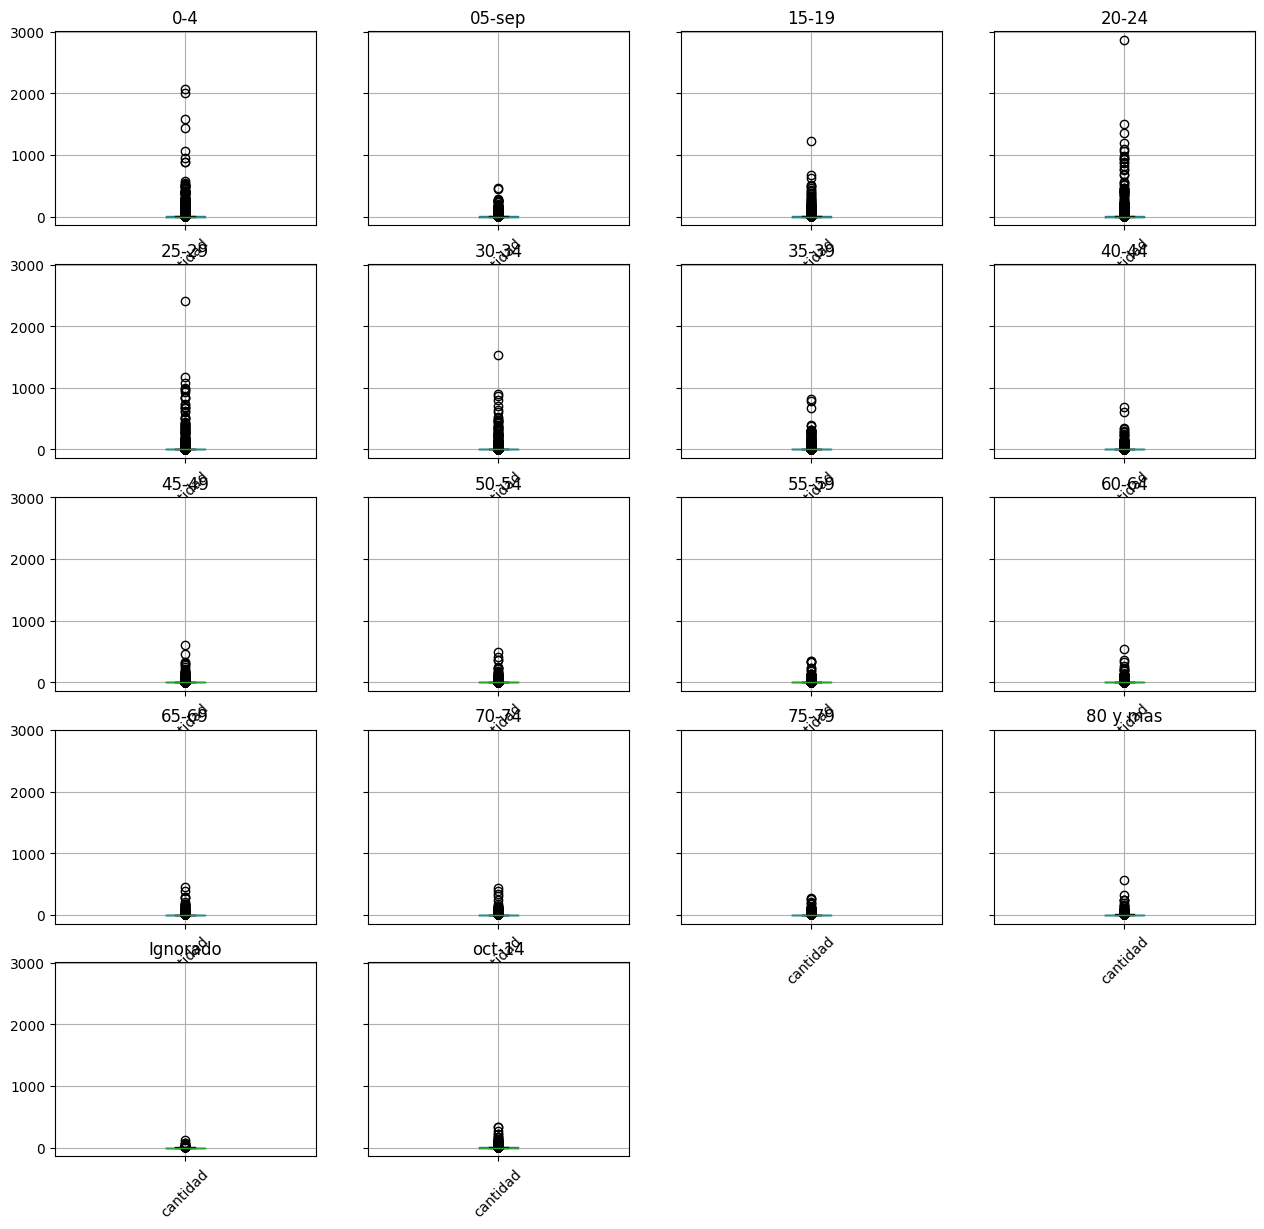

In [35]:
from numpy.lib.function_base import rot90
df.groupby('grupo_edad').boxplot(figsize=(15,15),rot=45)

In [5]:
df.isna ()

,anio,region_sanitaria,municipio_nombre,municipio_id,sexo,grupo_edad,causa_egreso_capitulo,causa_egreso_agrupamiento,tipo_egreso,cantidad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
158915,False,False,False,False,False,False,False,False,False,False
158916,False,False,False,False,False,False,False,False,False,False
158917,False,False,False,False,False,False,False,False,False,False
158918,False,False,False,False,False,False,False,False,False,False


In [26]:
df.columns

Index(['anio', 'region_sanitaria', 'municipio_nombre', 'municipio_id', 'sexo',
       'grupo_edad', 'causa_egreso_capitulo', 'causa_egreso_agrupamiento',
       'tipo_egreso', 'cantidad'],
      dtype='object')

In [27]:
keep=['municipio_nombre','grupo_edad','causa_egreso_agrupamiento','tipo_egreso','cantidad']
df=df [keep]
df

,municipio_nombre,grupo_edad,causa_egreso_agrupamiento,tipo_egreso,cantidad
0,25 de mayo,0-4,Complicaciones del trabajo de parto y del parto,Alta definitiva,1
1,25 de mayo,oct-14,Todos,Alta definitiva,1
2,25 de mayo,75-79,Demás enfermedades del sistema genitourinario,Alta definitiva,1
3,Bahía Blanca,45-49,Tumor malignodel utero,Alta definitiva,1
4,Berazategui,20-24,Aborto,Alta definitiva,1
...,...,...,...,...,...
158915,Zárate,55-59,COVID-19,Otro,9
158916,Zárate,60-64,COVID-19,Otro,2
158917,Zárate,65-69,Demás enfermedades del sistema respiratorio,Otro,1
158918,Zárate,70-74,COVID-19,Otro,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158920 entries, 0 to 158919
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   municipio_nombre           158920 non-null  object
 1   grupo_edad                 158920 non-null  object
 2   causa_egreso_agrupamiento  158920 non-null  object
 3   tipo_egreso                158920 non-null  object
 4   cantidad                   158920 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 6.1+ MB


In [37]:
import folium as fl

PRACTICAMOS EN LA REALIZACION DE UN MAPA

In [38]:
mapa=fl.Map()
mapa

#BUSCAMOS LA LATITUD Y LONGITUD DE LA PROVINCIA DE BUENOS AIRES PARA VISUALIZAR UN MAPA Y ENCONTRAR LOS DIFERENTES MUNICIPIOS ESTUDIADOS

In [39]:
mBSAS=fl.Map(location=[-34.61315,-58.37723],width="60%",height="60%",zoom_start=11)
mBSAS

#colocamos indicadores en los 5 primeros municipios con mas cantidad de  egresos hospitalarios de la base de datos estudiada

In [40]:
fl.Marker (location=[-34.75,-58.58333],popup="la matanza 3685 egresos").add_to(mBSAS)
fl.Marker(location=[-58.7064,-34.5067],popup="Malvinas Argentina 4114 egresos").add_to(mBSAS)
fl.Marker(location=[-34.42583,-58.59667],popup="Tigre 3358 egresos").add_to(mBSAS)
fl.Marker(location=[-34.34667,-58.81861],popup="Escobar 3128 egresos").add_to(mBSAS)
fl.Marker(location=[-34.92145,-57.95453],popup="La Plata 3475 egresos").add_to(mBSAS)

mBSAS
